# 🧪 Exploración de Datos

En esta fase se realiza un análisis exploratorio de las características extraídas de las imágenes médicas. El objetivo principal es **comprender la distribución de los datos**, identificar patrones, correlaciones y posibles problemas como datos atípicos o redundancia. Esta etapa es clave para preparar la información antes de aplicar técnicas de selección de características y entrenar modelos de aprendizaje automático.

In this phase, an exploratory analysis of the features extracted from the medical images is performed. The main goal is to **understand the data distribution**, identify patterns, correlations, and potential issues such as outliers or redundancy. This step is critical to prepare the dataset for feature selection techniques and machine learning model training.

---

## 🛠️ Metodología / Methodology

- **Visualización de características**:
  - Histogramas, diagramas de dispersión y mapas de calor para analizar la distribución y correlación entre variables.
- **Análisis de correlación**:
  - Uso de métricas estadísticas para evaluar la relación entre las características y la variable objetivo.

---

## 🎯 Objetivo Final / Final Goal

Generar un conjunto de datos confiable y optimizado que permita entrenar modelos de clasificación binaria para detectar imágenes médicas manipuladas de manera efectiva.

---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("muted")
sns.set_context("notebook", font_scale=1.2)


In [ ]:
# Cargar el archivo
#data = np.load("data.npz")

# Acceder a los arrays
#X = data['X']
#feature_names = [f"feat_{i}" for i in range(X.shape[1])]

#df = pd.DataFrame(X, columns=feature_names)



# Cargar el archivo
data = np.load("data.pkl", allow_pickle=True)

df = data.drop(columns=['uuid', 'label'])
print(f'Dimensiones de X: {X.shape}')


Dimensiones de X: (474, 30)


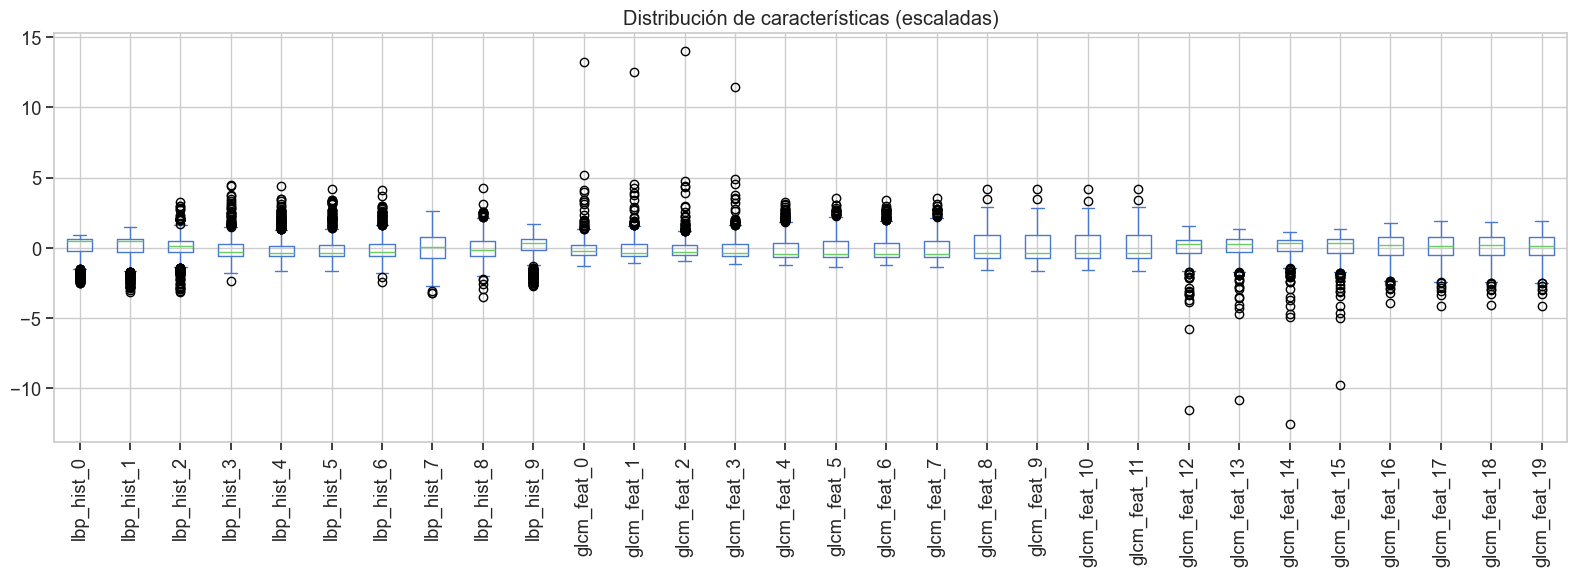

In [ ]:
from sklearn.preprocessing import StandardScaler
df.describe().T


scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled.plot.box(figsize=(16, 6))
plt.title("Distribución de características (escaladas)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


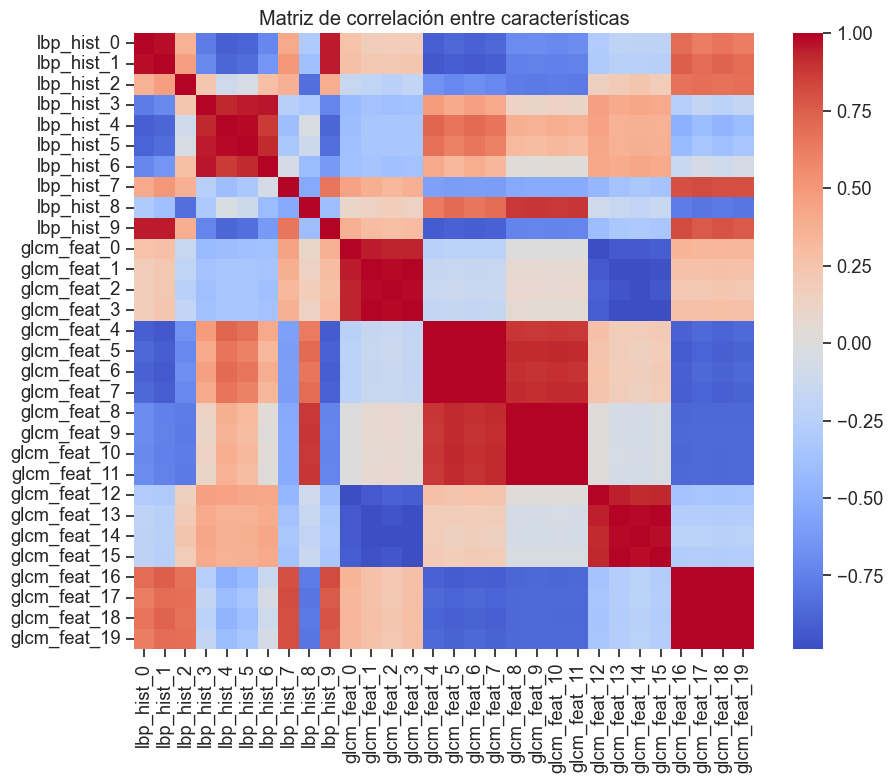

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X_high_var = selector.fit_transform(df)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre características")
plt.show()

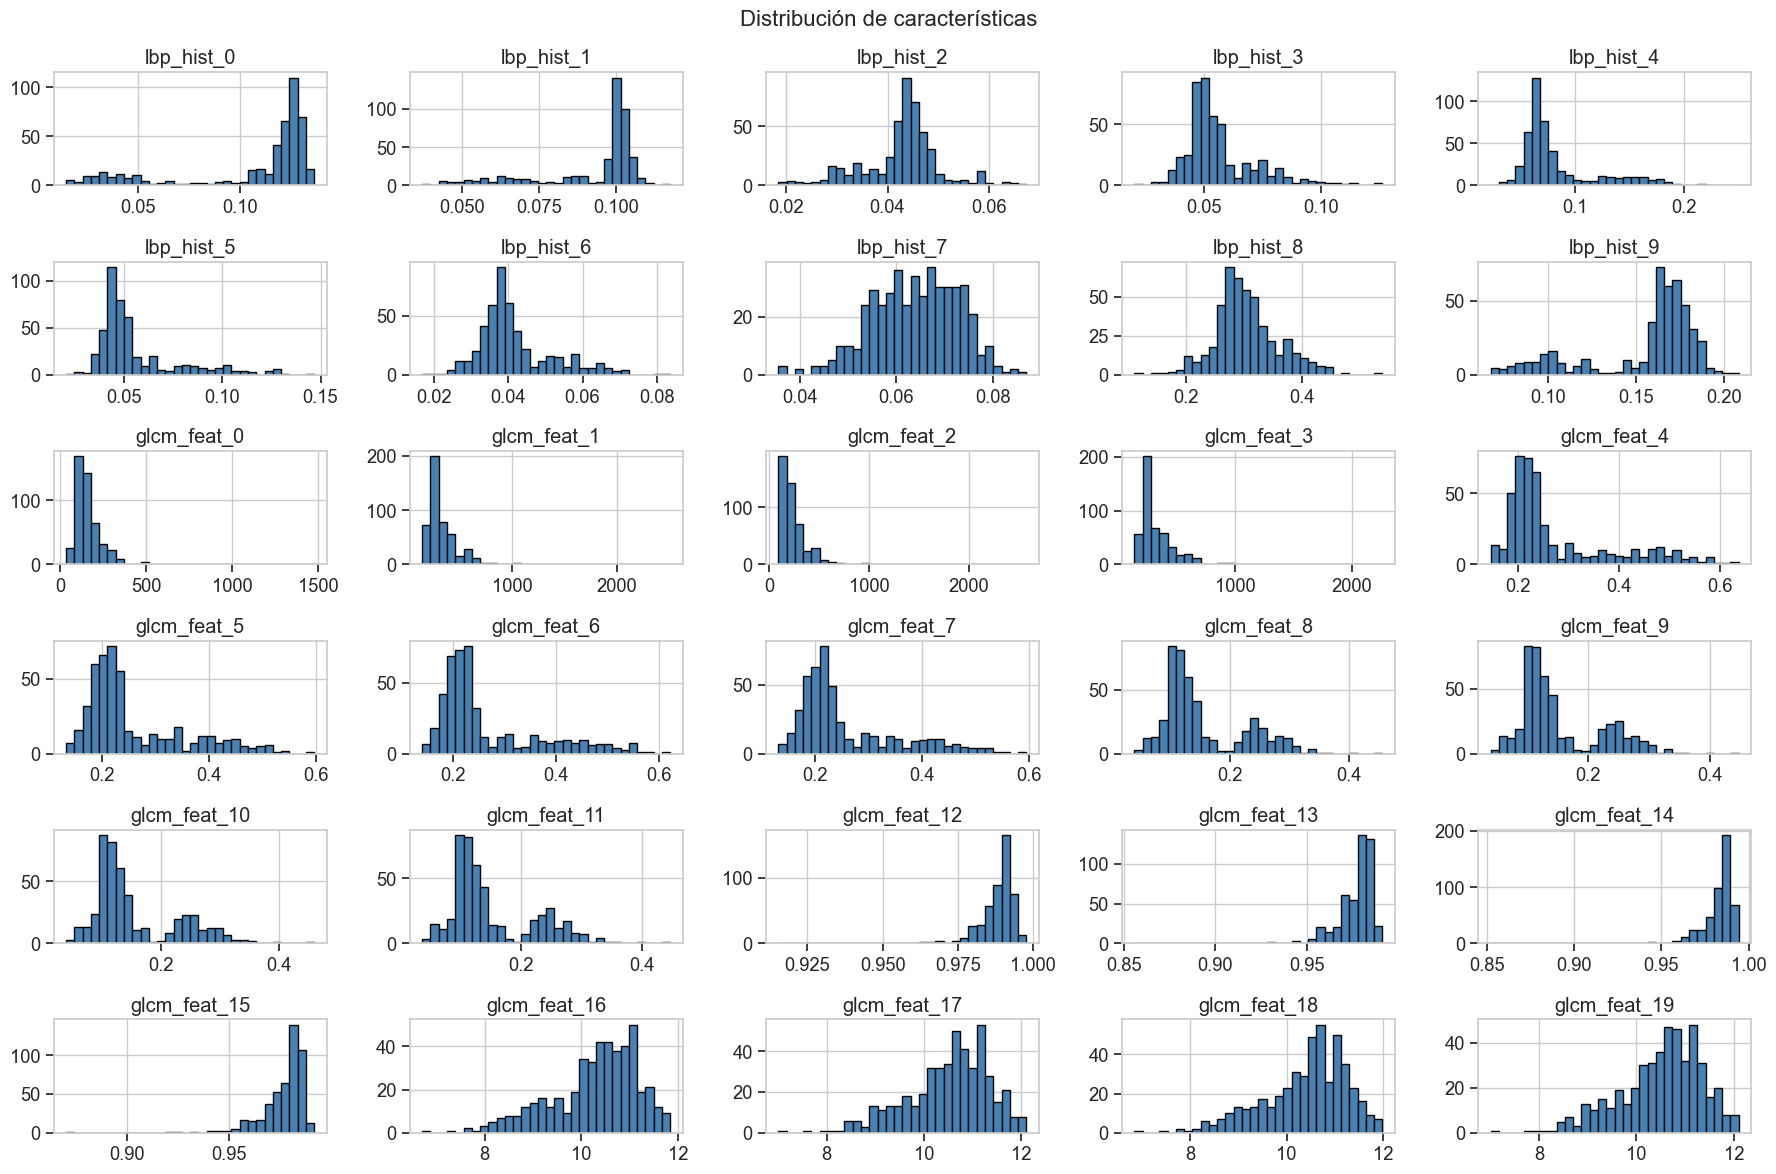

In [7]:
# Graficar histogramas para todas las características
df.hist(bins=30, figsize=(18, 12), color='steelblue', edgecolor='black')
plt.suptitle("Distribución de características", fontsize=16)
plt.tight_layout()
plt.show()
